<a href="https://www.kaggle.com/code/fabiuslihanda/titanic-exploratory-data-analysis?scriptVersionId=243267020" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 1. Data Loading and Initial Exploration

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno  

# Configuring Seaborn plot aesthetics
sns.set_theme(style='darkgrid', context='notebook')

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the Titanic dataset
df = pd.read_csv('/kaggle/input/titanic/train.csv')

# Display the first few rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Dataset Overview

In [3]:
# Check the shape of the dataset
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset has 891 rows and 12 columns.


In [4]:
# Displaying dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Summary Statistics

In [5]:
# Generating summary statistics for numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


## Columns Information

In [6]:
# Get the names of all columns in the dataset
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Unique Values

In [7]:
# Get Unique values in each column
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

## Duplicate Entries

In [8]:
# Checking for duplicate rows
df.duplicated().sum()

0

## Missing Values

<Axes: >

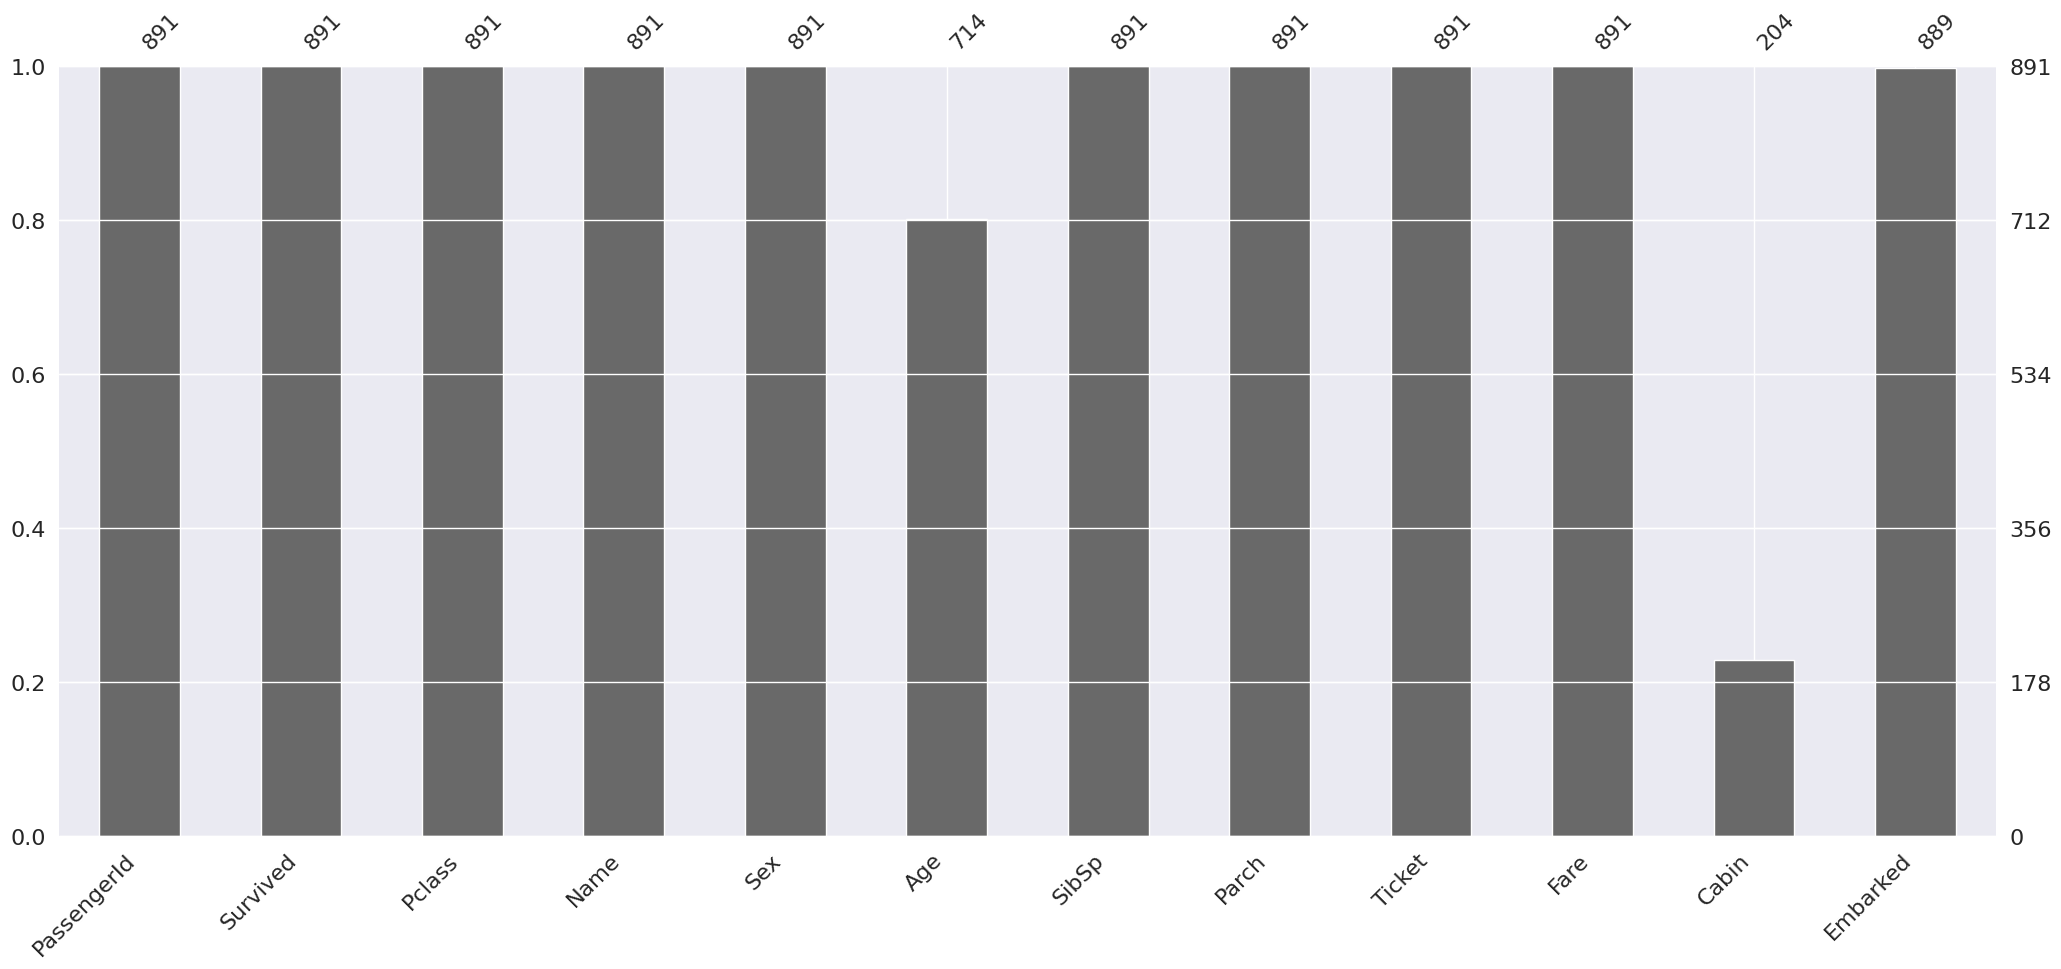

In [9]:
# Visualize missing data 
msno.bar(df)

In [10]:
# list missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 2. Data Cleaning
## Handling Missing Values

The dataset contained missing values in the `Age`, `Embarked`, and `Cabin` columns. The following strategies were applied:

- **Age**: Missing values were filled using the median age to preserve the distribution while minimizing the influence of outliers.
- **Embarked**: The most frequent embarkation port (mode) was used to fill the missing entries.
- **Cabin**: This column had over 77% missing values, and its entries are sparse and non-standardized (e.g., 'C85', 'E46'). Therefore, it was dropped to maintain data quality and simplify the analysis. This decision is supported by the fact that meaningful imputation would require additional domain knowledge and introduce potential bias.


In [11]:
# Imputing missing Age values with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Imputing missing Embarked values with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Dropping the Cabin column
df.drop('Cabin', axis=1, inplace=True)

In [12]:
# Validate missing values
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Type Conversion

Before diving into univariate analysis, it's essential to ensure that each column has the correct data type. In the Titanic dataset, columns such as `Survived`, `Pclass`, `Sex`,  and `Embarked` represent categorical data, even though some may be stored as integers or objects. These were explicitly converted to the `category` data type to ensure accurate analysis and efficient memory usage.


In [13]:
# Converting data types
df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')


In [14]:
# Confirm dtype conversions
print(df.dtypes)

PassengerId       int64
Survived       category
Pclass         category
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Embarked       category
dtype: object


### Since No duplicates were found, we proceed to the Univariate analysis

#  3. Univariate Analysis
We analyze each feature individually to understand its distribution and characteristics.

 ## Age Distribution

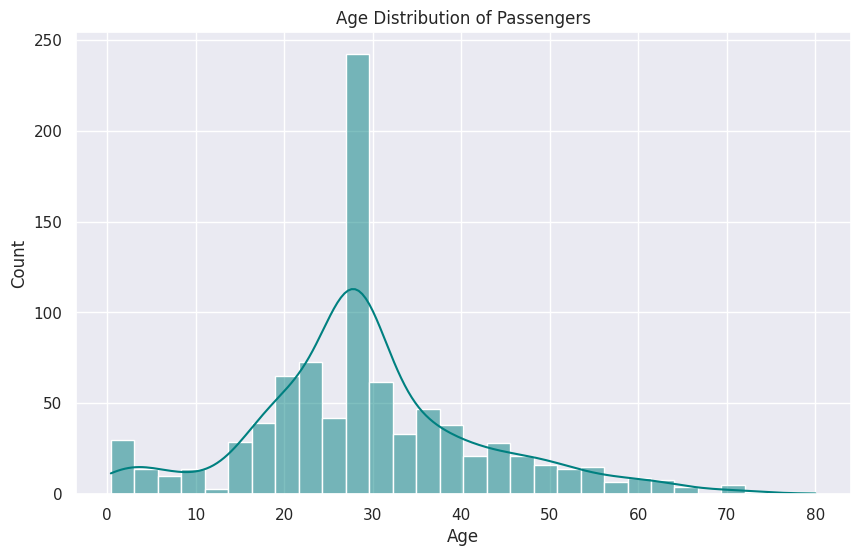

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=30, color='teal')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


### Observations

- Most passengers were between `20–40` years old.

- Distribution is `slightly right-skewed`, with a long tail of older passengers.

## Embarked Location

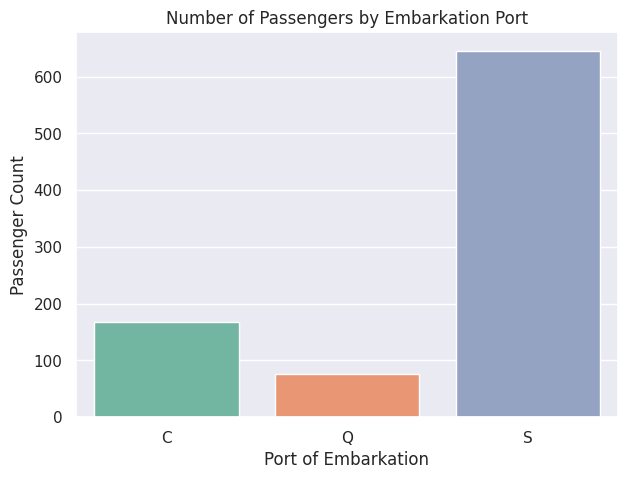

In [16]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Embarked', palette='Set2')
plt.title('Number of Passengers by Embarkation Port')
plt.xlabel('Port of Embarkation')
plt.ylabel('Passenger Count')
plt.show()


### Observations

- Most passengers boarded at `Southampton (S)`.

- `Cherbourg (C)` and `Queenstown (Q)` follow.

## Fare Distribution

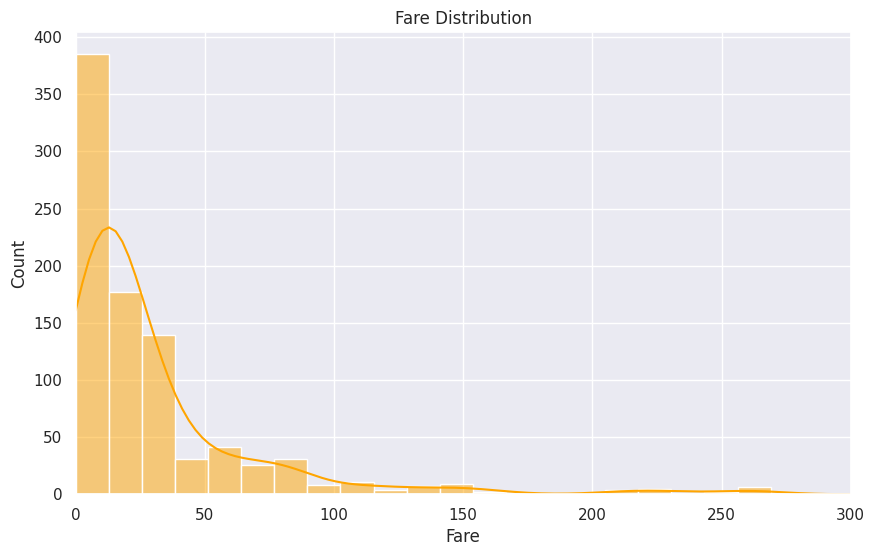

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'], bins=40, kde=True, color='orange')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.xlim(0, 300)  # Exclude extreme outliers for clarity
plt.show()


### Observations

- Fare distribution is `highly right-skewed`.

- Majority of tickets were under `$100`, though a few passengers paid significantly more.

## Categorical Features

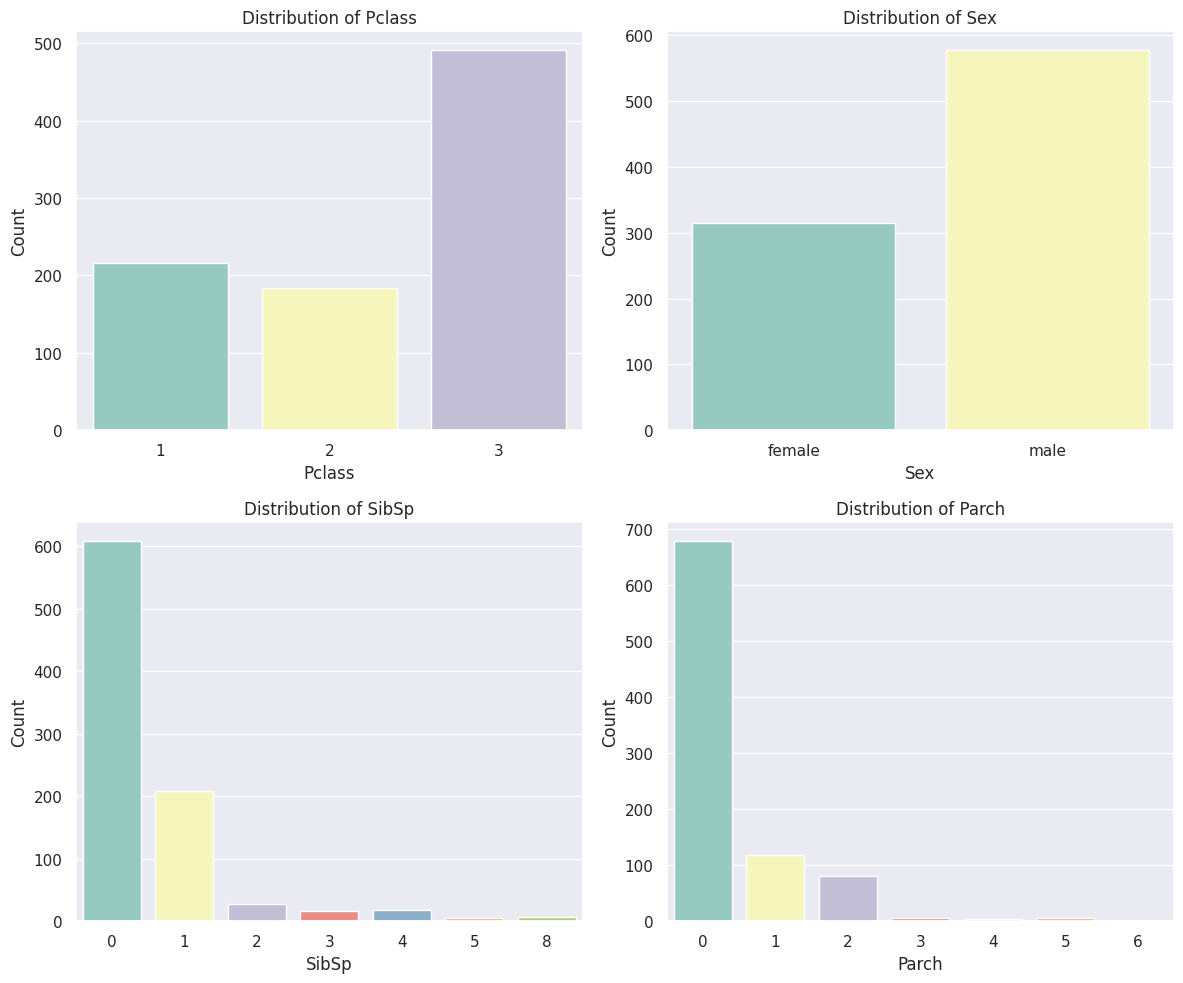

In [18]:
categorical_cols = ['Pclass', 'Sex', 'SibSp', 'Parch']
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, palette='Set3', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

### Observations

- `More male` than `female` passengers.

- `Majority` traveled in `3rd` class.

- Most passengers had `no siblings`/`spouses or parents`/`children aboard`.

# 4. Bivariate Analysis
In bivariate analysis, we explore relationships between two variables — typically pairing features with either each other or the target variable (Survived) to uncover patterns or dependencies.

## Survival Rate by Sex

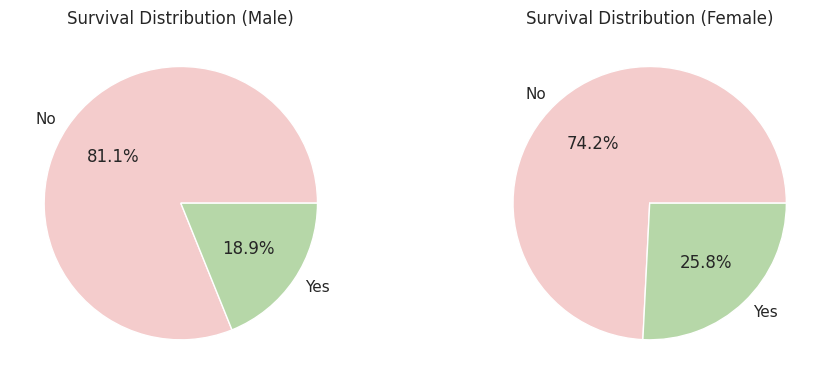

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

for i, sex in enumerate(['male', 'female']):
    df_sex = df[df['Sex'] == sex]
    survival_counts = df_sex['Survived'].value_counts()
    axes[i].pie(survival_counts, labels=['No', 'Yes'], autopct='%1.1f%%', colors=['#f4cccc', '#b6d7a8'])
    axes[i].set_title(f'Survival Distribution ({sex.capitalize()})')

plt.tight_layout()
plt.show()


### Observations

- Significantly `more females survived than males`.

- Gender played a strong role in survival probability.

## Survival by Passenger Class (Pclass)

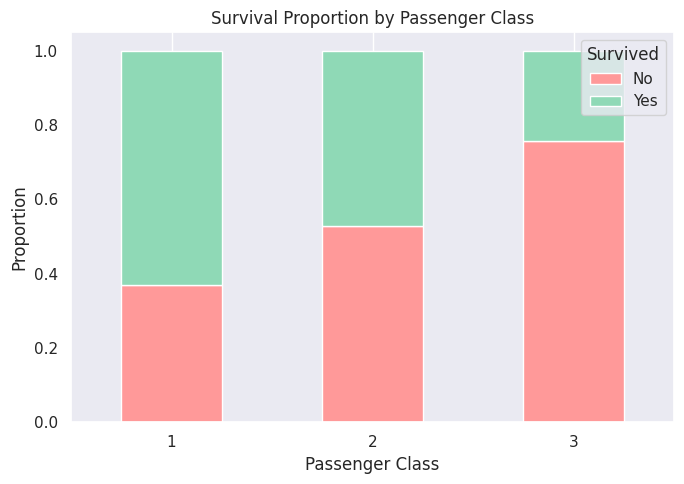

In [20]:
# Prepare normalized data
pclass_survival = pd.crosstab(df['Pclass'], df['Survived'], normalize='index')

# Plot stacked bar chart
pclass_survival.plot(kind='bar', stacked=True, color=['#FF9999', '#8FD9B6'], figsize=(7, 5))

plt.title('Survival Proportion by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Proportion')
plt.legend(title='Survived', labels=['No', 'Yes'], loc='upper right')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



### Observations

- `1st Class` passengers had the `highest survival rate`.

- `3rd Class` passengers had the `lowest chance of survival`.

## Age vs. Survival

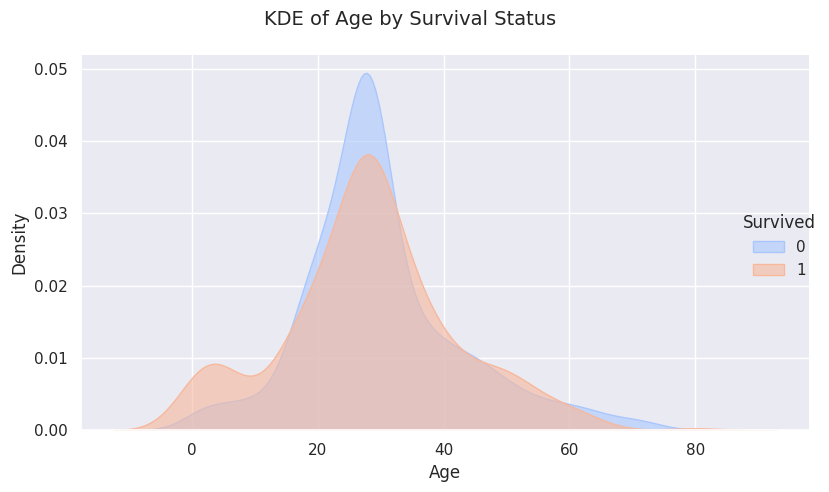

In [21]:
g = sns.FacetGrid(df, hue='Survived', height=5, aspect=1.5, palette='coolwarm')
g.map(sns.kdeplot, 'Age', fill=True, common_norm=False, alpha=0.6)
g.add_legend(title='Survived')
g.set_axis_labels("Age", "Density")
g.fig.suptitle('KDE of Age by Survival Status', fontsize=14)
plt.tight_layout()
plt.show()


### Observations

- Survival was relatively `high among young children`.

- `Middle-aged adults (20–40)` had `lower survival rates` compared to older adults.

## Fare vs. Pclass

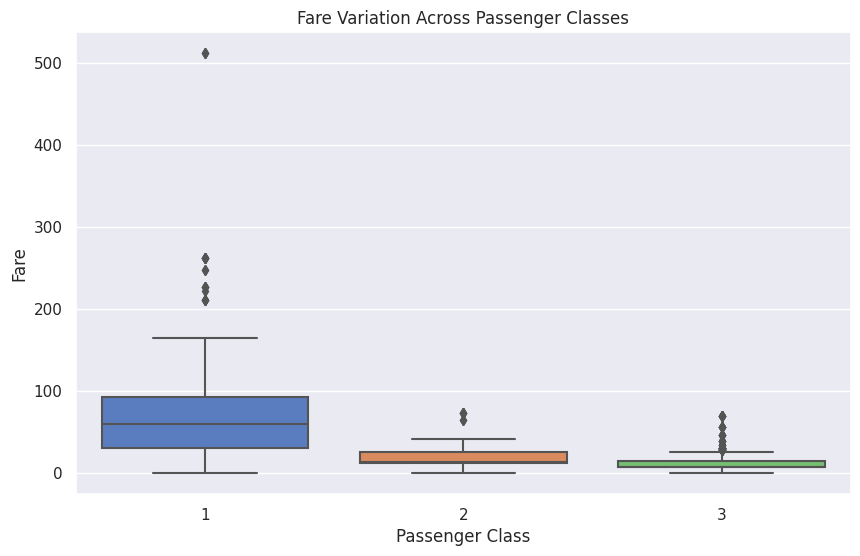

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Pclass', y='Fare', palette='muted')
plt.title('Fare Variation Across Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()


### Observations

- 1st Class tickets were considerably `more expensive`.

- Outliers exist in all classes, but `especially in 1st class`.

## Embarked vs. Survival

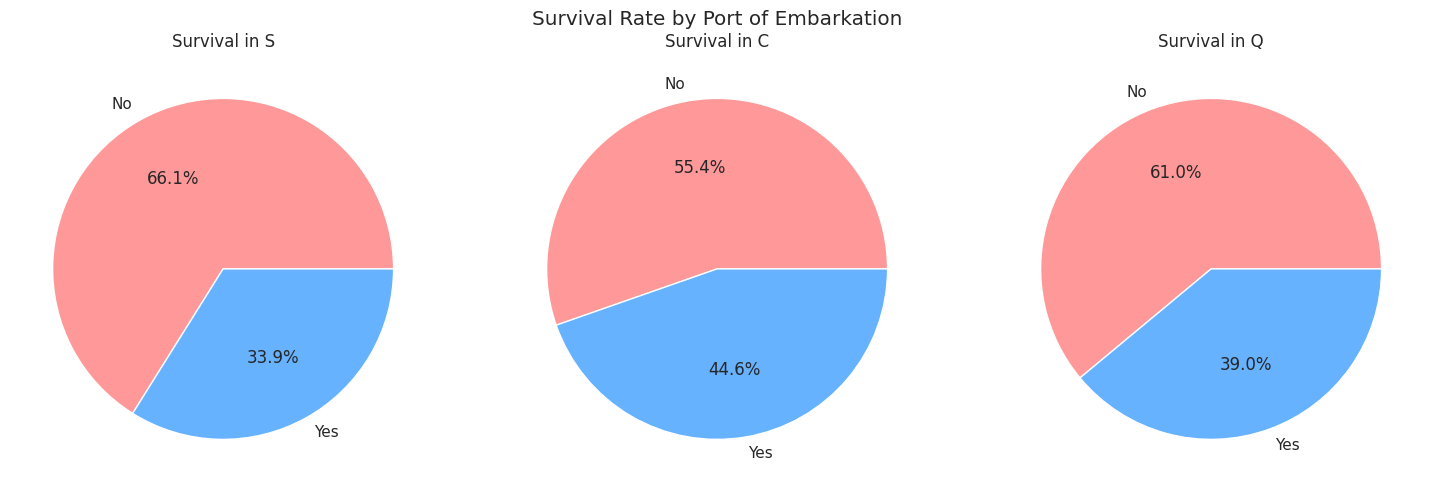

In [23]:
# Setup
ports = df['Embarked'].dropna().unique()
fig, axes = plt.subplots(1, len(ports), figsize=(15, 5))

# Plot one pie per port
for i, port in enumerate(ports):
    data = df[df['Embarked'] == port]['Survived'].value_counts()
    axes[i].pie(data, labels=['No', 'Yes'], autopct='%1.1f%%', colors=['#FF9999','#66B2FF'])
    axes[i].set_title(f'Survival in {port}')

plt.suptitle('Survival Rate by Port of Embarkation')
plt.tight_layout()
plt.show()


### Observations

- Passengers from `Cherbourg (C) had higher survival rates`.

- Those who boarded at `Southampton (S) had lower chances of survival`.

# 5. Multivariate Analysis
Multivariate analysis helps us explore how multiple variables interact to affect survival outcomes. This section investigates complex questions that cannot be fully addressed through univariate or bivariate analysis.

## Survival by Pclass, Age, and Fare (Joint Influence)

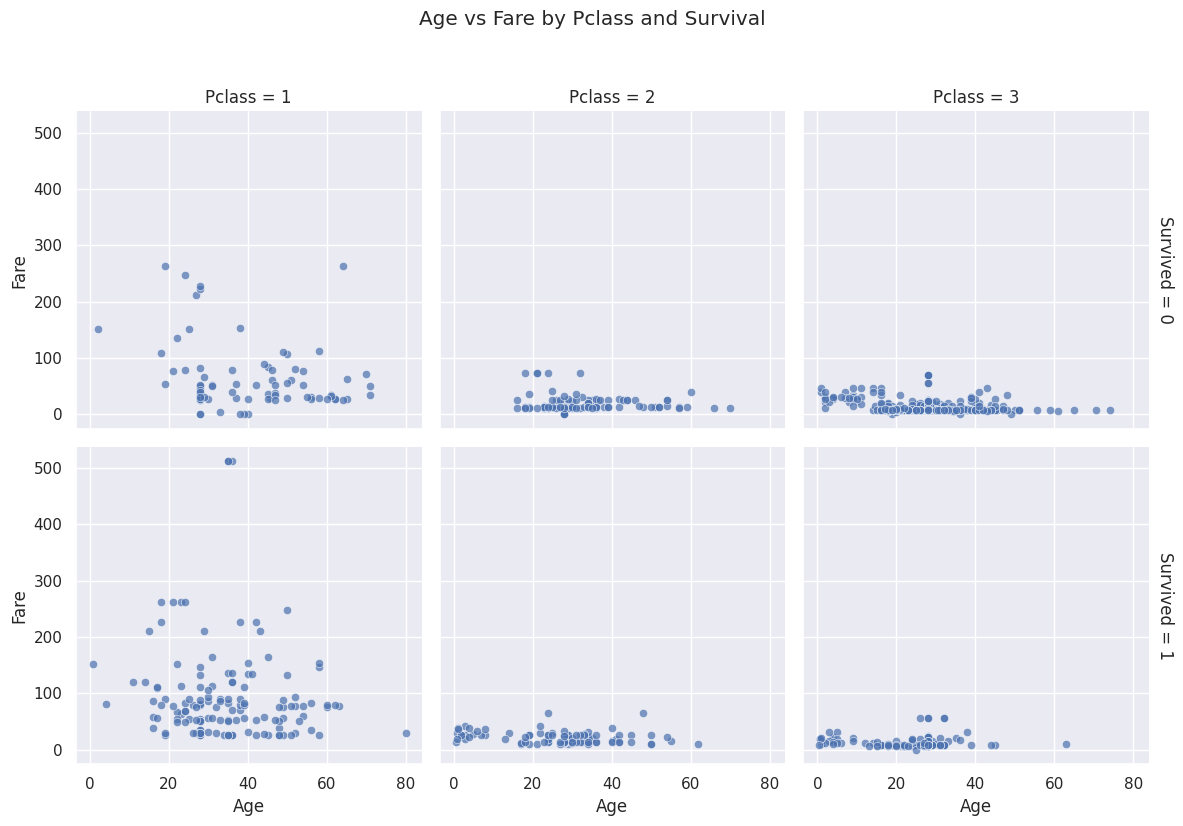

In [24]:
# Create a FacetGrid to analyze Age vs Fare across Pclass and Survival
g = sns.FacetGrid(df, col='Pclass', row='Survived', height=4, margin_titles=True)
g.map_dataframe(sns.scatterplot, x='Age', y='Fare', alpha=0.7, edgecolor='w')
g.set_axis_labels("Age", "Fare")
g.set_titles(row_template='Survived = {row_name}', col_template='Pclass = {col_name}')
plt.suptitle('Age vs Fare by Pclass and Survival', y=1.03)
plt.tight_layout()
plt.show()

### Observations
- `Higher fares` and `younger ages` in `1st class` are more associated with survival.

- In `3rd class`, survival appears concentrated among `younger` passengers `regardless of fare`.

- This shows a combined effect of class, age, and fare on survival.

## Survival by Embarked  locations when considering Pclass
A heatmap can show how the survival rate changes when both Pclass and Embarked are considered together.

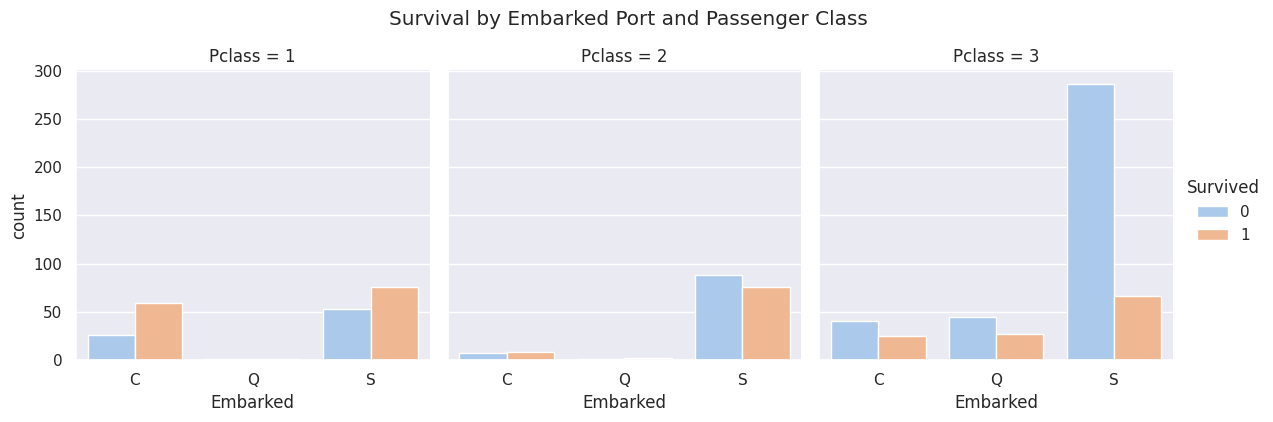

In [25]:
# Create a catplot for Embarked vs Survived across Pclass
sns.catplot(data=df, x='Embarked', hue='Survived', col='Pclass', kind='count', palette='pastel', height=4, aspect=1)
plt.suptitle('Survival by Embarked Port and Passenger Class', y=1.05)
plt.show()


### Observations
- First-class passengers `from Cherbourg` had the `highest survival rates`, indicating a strong        class and embarkation advantage.

- In 3rd class, passengers `from Southampton (S)` had `low survival rates`.

- The Embarked port indirectly reflects socioeconomic status, which impacts both class and survival    likelihood.

- Survival likelihood was highest for first-class passengers from Cherbourg and lowest for third-class passengers from Southampton. This supports the theory that class and embarkation port together reflect socio-economic factors that significantly influenced survival.



## Visualizing Age, Sex, and Pclass Together

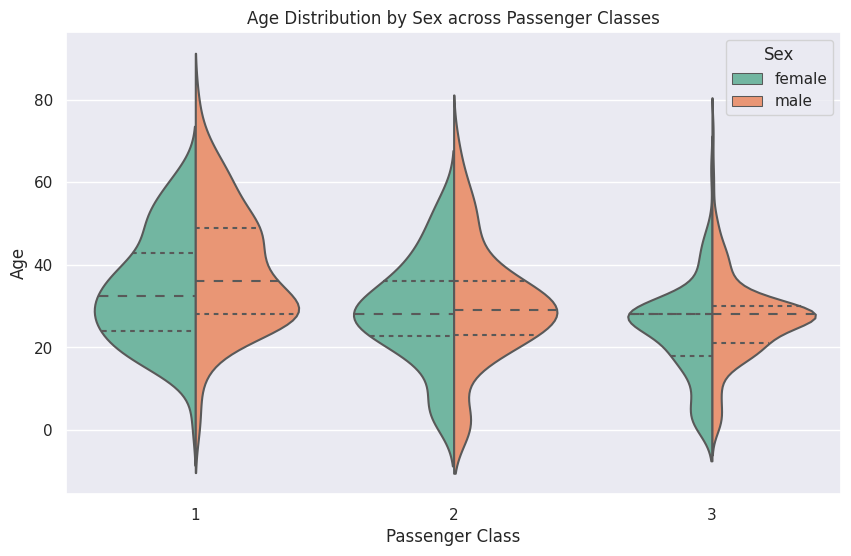

In [26]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Pclass', y='Age', hue='Sex', split=True, inner='quart', palette='Set2')
plt.title('Age Distribution by Sex across Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()


### Observation
- In `1st class`, females and males had similar age distributions, `mostly adult`.

- In 3rd class, there was a larger spread of `younger` passengers, `especially males`.

- This informs us that demographics by class and gender influenced survival policies (e.g., “women and children first”).

## Heatmap of Feature Correlations

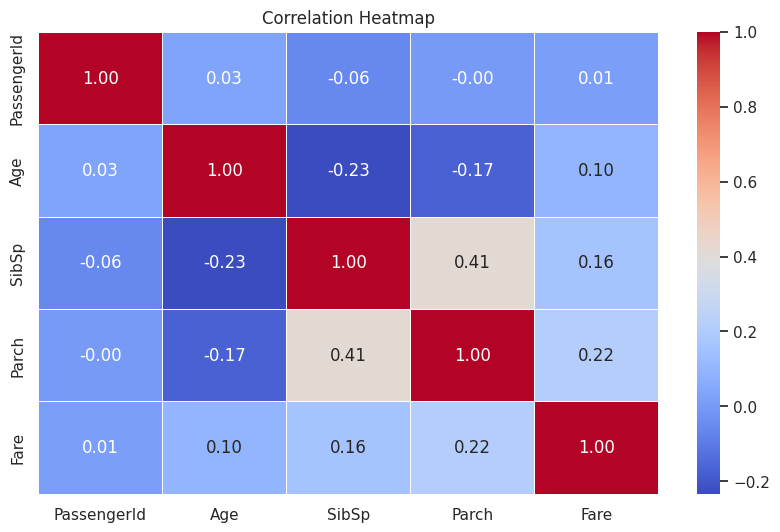

In [27]:
# Convert categorical data for correlation analysis
df_corr = df.copy()
df_corr['Sex'] = df_corr['Sex'].map({'male': 0, 'female': 1})
df_corr['Embarked'] = df_corr['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Keep only numeric columns
numeric_df = df_corr.select_dtypes(include=['number'])

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


### Observations
- Family Travel: SibSp and Parch (0.41) show a moderate positive correlation — indicating family members often traveled together.

- Age Factor: Age is negatively correlated with both SibSp and Parch — younger passengers were more likely to travel with family.

- Fare Impact: Slightly higher fares were paid by those traveling with family, suggesting group or upgraded bookings.

# 6. Outlier Detection and Handling
Outliers can distort statistical models and mislead interpretations, especially for continuous features like Fare and Age. We will detect them and decide how best to handle each case.

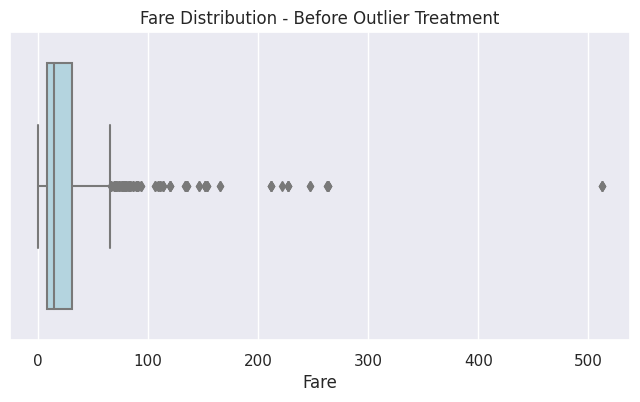

In [28]:
# Boxplot of Fare before handling outliers
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Fare', color='lightblue')
plt.title('Fare Distribution - Before Outlier Treatment')
plt.show()


### Observation

- Fare is `highly skewed` with extreme values, especially in the 1st class.

### Justification & Handling
- Outliers in Fare represent wealthy passengers (e.g., multiple cabins or luxury suites).

- Removing them would erase meaningful socio-economic insight.

- For balanced analysis without losing data, we apply `capping` at the 99th percentile.

### A. Fare

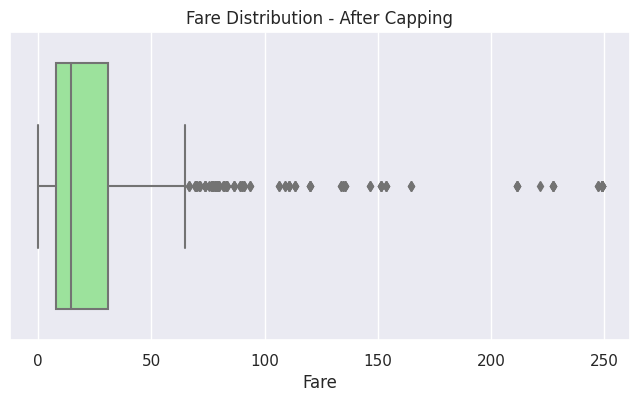

In [29]:
# Capping extreme fare values
fare_cap = df['Fare'].quantile(0.99)
df['Fare'] = np.where(df['Fare'] > fare_cap, fare_cap, df['Fare'])

# Re-plot after capping
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Fare', color='lightgreen')
plt.title('Fare Distribution - After Capping')
plt.show()


### B. Age

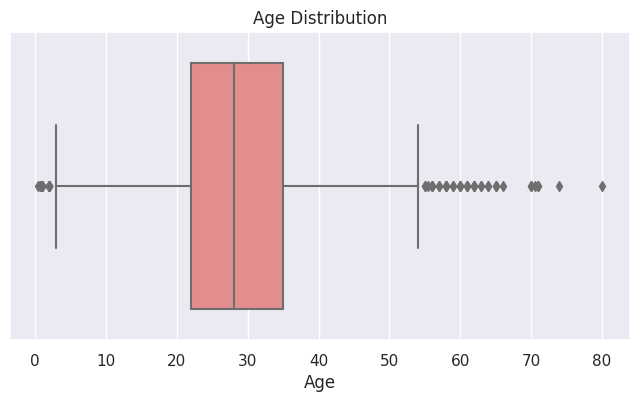

In [30]:
# Boxplot for Age
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Age', color='lightcoral')
plt.title('Age Distribution')
plt.show()


### Observation

- Age shows `mild right skewness`, but outliers are not extreme and include elderly passengers.

### Justification & Handling
- These values represent real-world passengers (elderly, VIPs) and don’t distort the age distribution.

- Therefore, `we leave Age as is`, preserving integrity for survival analysis.

# 7. Target Variable Exploration – Survived

## Target Distribution

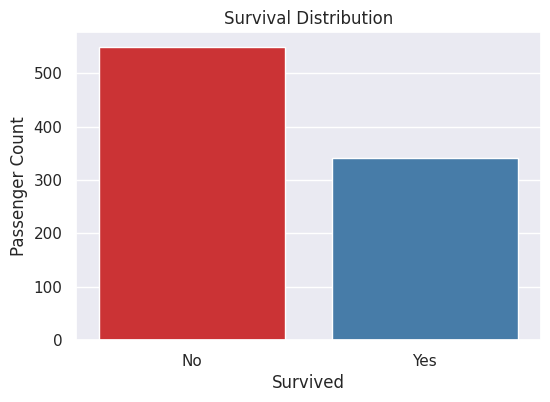

In [31]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Survived', palette='Set1')
plt.title('Survival Distribution')
plt.xlabel('Survived')
plt.ylabel('Passenger Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


In [32]:
# Percentage survival rate
survival_dist = df['Survived'].value_counts(normalize=True) * 100
print(survival_dist)


Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


### Observation

- 38% survived and 62% did not.

- The dataset is moderately imbalanced, which may affect predictive models and needs handling (e.g., stratified sampling or balanced classifiers).

## Influence of Gender and Class

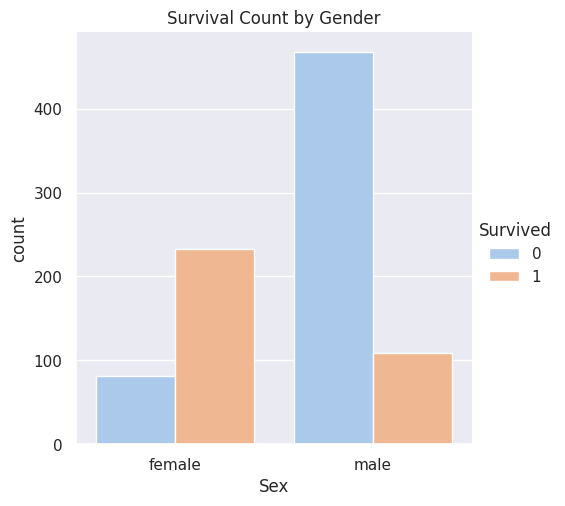

In [33]:
sns.catplot(data=df, x='Sex', hue='Survived', kind='count', palette='pastel')
plt.title('Survival Count by Gender')
plt.show()


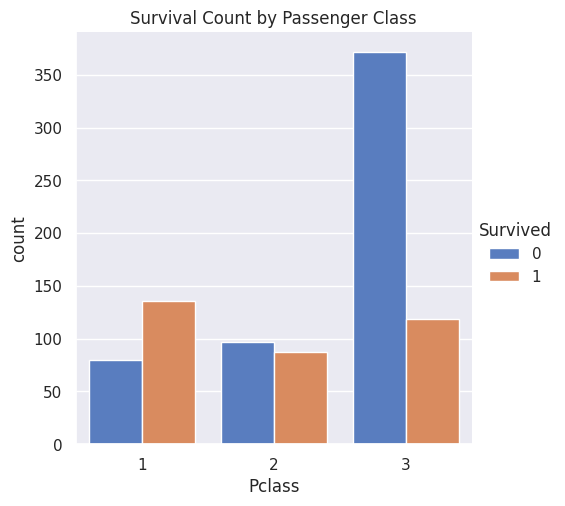

In [34]:
sns.catplot(data=df, x='Pclass', hue='Survived', kind='count', palette='muted')
plt.title('Survival Count by Passenger Class')
plt.show()


### Observations

- Females had much higher survival rates.

- 1st class passengers had the highest survival rates — suggesting prioritization based on class and gender.



## Interaction Effects: Gender, Age, and Class

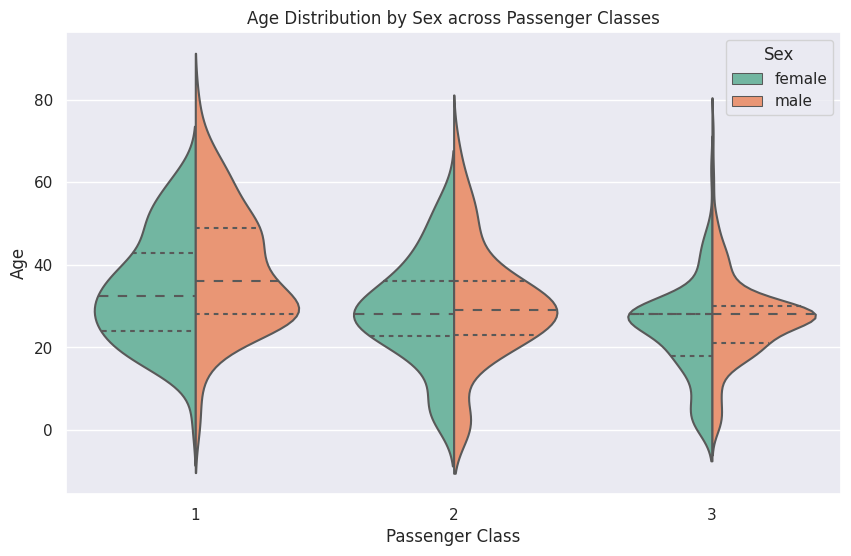

In [35]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Pclass', y='Age', hue='Sex', split=True, inner='quart', palette='Set2')
plt.title('Age Distribution by Sex across Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()


### Observations

- In 3rd class, there’s a higher concentration of young male passengers.

- 1st class has older male and female passengers, many of whom survived — again linking survival with socio-economic status.

## Combined Plot: Embarked, Class, and Survival

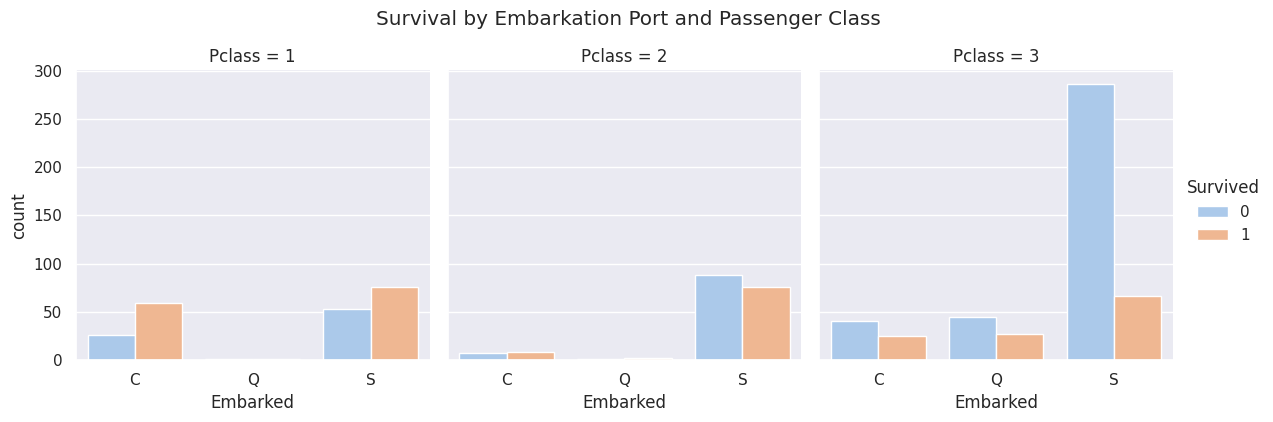

In [36]:
sns.catplot(data=df, x='Embarked', hue='Survived', col='Pclass', kind='count', palette='pastel', height=4)
plt.suptitle('Survival by Embarkation Port and Passenger Class', y=1.05)
plt.show()


### Observation

- 1st class passengers from Cherbourg (C) had the highest survival rates.

- 3rd class passengers from Southampton (S) had the lowest survival.

- Socio-economic status, travel class, and boarding location jointly influenced survival chances.